In [49]:
# !pip install -e .

# Imports

In [50]:
import functools
import random
import time
from arc.interface import Board, BoardPair
from arc.utils.dataset import get_riddles
from arcmentations import functional
from arcmentations.augmentations.color import RandomColor
from arcmentations.augmentations.helpers import same_aug_for_all_pairs_helper, same_aug_for_riddle_helper
from arcmentations.augmentations.spatial import DirectionTypeRandomDouble, RandomDoubleInputBoard, RandomRotate, RandomReflect
from arcmentations.vis_helpers import plot_task
from arcmentations.augmentations import RandomCropInputAndOuput

# Load riddles

In [51]:
train_riddles = get_riddles(["training"])

2022-08-05 03:15:01.640 | INFO     | arc.utils.dataset:get_riddles:96 - Loading riddles from ['training']


# Original riddle

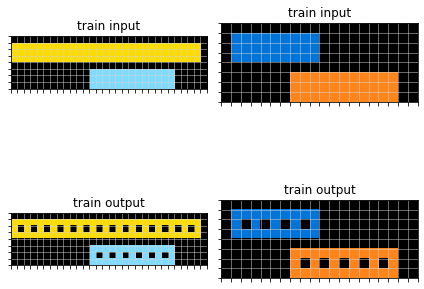

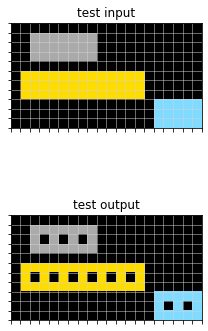

In [52]:
riddle = train_riddles[1]
plot_task(riddle)

# Permute color

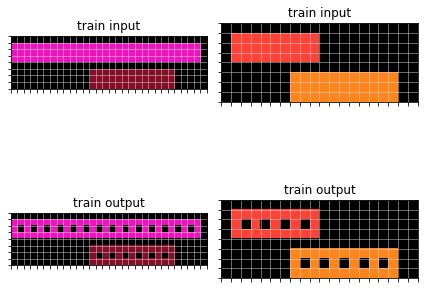

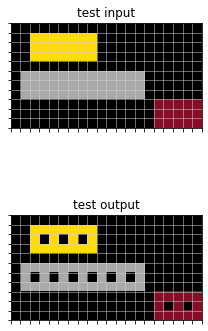

In [53]:
aug = RandomColor(p=1, same_aug_for_all_pairs=True, include_0=False)
aug_riddle = riddle.copy()
aug_riddle.train = aug(aug_riddle.train)
aug_riddle.test = aug(aug_riddle.test)
plot_task(aug_riddle)

# RandomCropInputAndOuput

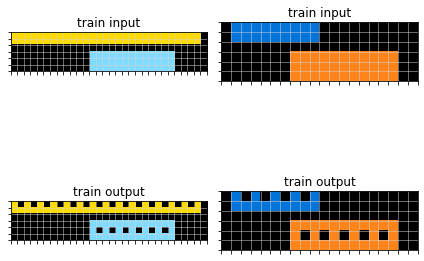

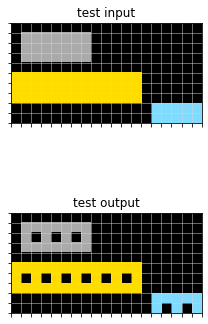

In [54]:
aug = RandomCropInputAndOuput(p=1,possible_num_cols_to_crop=range(5), possible_num_rows_to_crop=range(5),same_aug_for_all_pairs=True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(aug_riddle.train)
aug_riddle.test = aug(aug_riddle.test)
plot_task(aug_riddle)

# Double input board

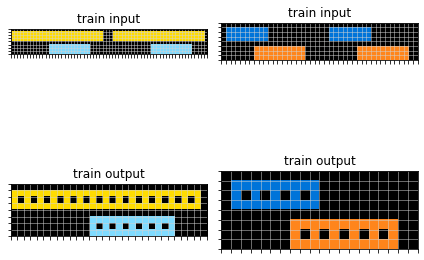

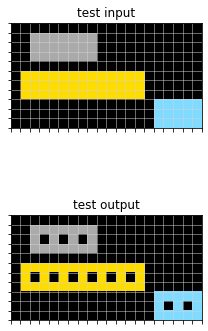

In [60]:
aug = RandomDoubleInputBoard(1, True)
aug_riddle = riddle.copy(deep=True)
aug_riddle.train = aug(aug_riddle.train)
plot_task(aug_riddle)

# Rotate

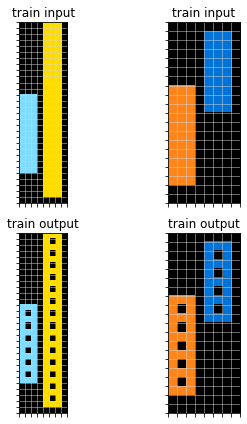

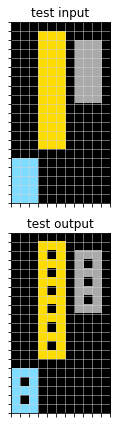

In [68]:
aug = RandomRotate(1, True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

# Reflect

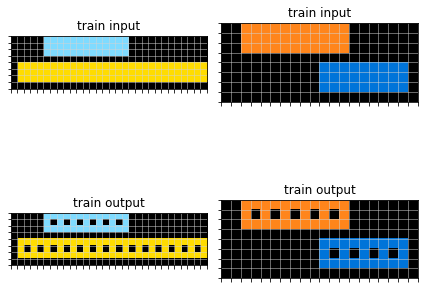

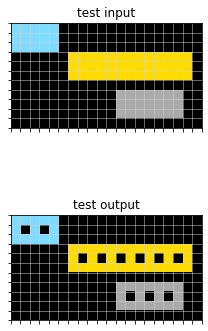

In [73]:
aug = RandomReflect(1, True)
aug_riddle = riddle.copy()
aug_riddle.train = aug(riddle.train)
aug_riddle.test = aug(riddle.test)
plot_task(aug_riddle)

# Chain them all together

In [74]:
from torchvision import transforms
augs = transforms.Compose([
    transforms.RandomOrder([
        RandomCropInputAndOuput(1, same_aug_for_all_pairs=True),
        RandomDoubleInputBoard(1, same_aug_for_all_pairs=True),
    ]),
    RandomColor(1, same_aug_for_all_pairs=True,include_0=False),
    RandomRotate(0.5, True),
    RandomReflect(0.5, True),
])

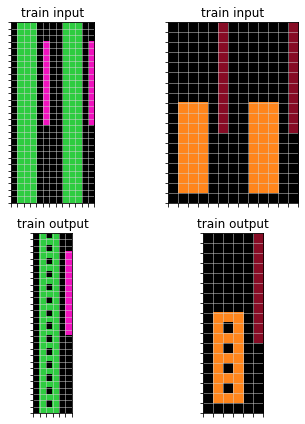

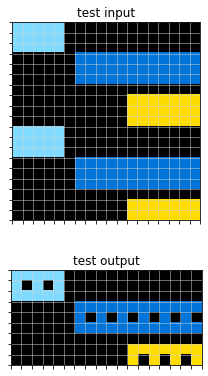

In [75]:
aug_riddle = riddle.copy()
aug_riddle.train= augs(riddle.train)
aug_riddle.test = augs(riddle.test)
plot_task(aug_riddle)